# Tarea N°3


<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 03
*12 de Octubre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez Martínez - Valeska Farías Caicedo - Constanza Perez Pulido - Rosario Valderrama Labarca


## 1. Objetivo

En este laboratorio deberá *aplicar* los algoritmos aprendidos en la clase e investigar del uso de la libreria python scikit-learn y sus funciones más útiles para estos métodos. Su meta es realizar un análisis de datos completo probando los distintos métodos supervisados vistos hasta ahora (Naive Bayes, Análisis de Discriminante, Regresión Logística).

Para esto utilizará la base load_breast_cancer anteriormente utilizada. Además los siguientes comandos de la librería sklearn, para la siguiente base:

```
# X, y =fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=Tru```
```

Por último, nos gustaría saber el destino de los dos pasajeros de los cuales se presentan sus boletos en el Titanic. También, nos interesa entender si la edad es un elemento determinante para la sobrevida.

## 2. Introducción  

En el presente laboratorio se utilizaron dos dataframe:

- load_breast_cancer, con el cual se pretende entrenar un modelo para predecir si el tumor de un paciente es maligno o benigno.
- titanic, cel este df se desea predecir si los pasajeros sobreviven o no.

Para lograr lo anterior, se utilizaron algoritmos de clasificación supervisados, para eso se utilizará Análisis de Discriminante Lineal (LDA) con el primer df (load_breast_cancer) y se realizará una regresión lineal además de  Naive Bayes para el df Titanic.

Adcionalmente, se desea conocer el destino de dos pasajeros en específico que mantienen las siguientes caracteristicas según su ticket de embarque:  

Pasajero N°1:  

  - Nombre: Miss Helene ragnhild Ostby
  - Sexo: Femenino
  - Edad: 22 años
  - Clase en la que viaja: 1ra. clase
  - Cabin: B-36
  - Embarque: Cherbourg  

Pasajero N°2:  
  - Nombre: Mr. Frederick Edward Giles
  - Sexo: Masculino
  - Edad: 21
  - Clase en la que viaja: 2da. clase
  - Cabin: Desconocida
  - Embarque: Southampton  

Para predecir si los dos pasajeros indicados sobreviven o no, se utiliza un árbol de clasificación que será entrenado para identificar las caracteristicas de los pasajeros que sobreviven y los que no, luego de eso podremos determinar el destino de ambos. el destino de ambos.

## 3. Importación de paquetes

In [8]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 4. Obtención del Dataset

### 4.1. load_brest_cancer

Detalles del dataset:  

El data frame contiene 569 filas con datos de pacientes con tumores, los cuales, pueden ser malignos o benignos, esto se determina según las caracteristicas del tumor que están descritas en distintas variables, como "promedio del radio", "promedio de la textura", "promedio del perimetro", entre otras.

Sus variables están conformadas por 30 características numéricas que describen las propiedades de los núcleos celulares presentes en una imagen digitalizada de un tumor. Se pretende determinar si el tumor es maligno o benigno.

Contiene: 
- Número de ejemplos (muestras): 569 instancias.
- Clases: 0 si es maligno y 1 = benigno.

In [20]:
cancer= pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)

Las variables son las siguientes:

In [23]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
# Verificar si hay valores nulos en el DataFrame
null_counts = cancer.isnull().sum()

# Mostrar las columnas que tienen valores nulos
print("Conteo de valores nulos por columna:")
print(null_counts[null_counts > 0])

Conteo de valores nulos por columna:
Series([], dtype: int64)


Verificamos la no existencia de valores nulos.  

A continuación se presentan algunos datos descriptivos:

In [27]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
#print(df_cancer.DESCR)

Se debe preparar el dataframe para aplicar los algoritmos.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


# Cargar el dataset de breast cancer
cancer_data = load_breast_cancer()

# Convertir a DataFrame (incluir tanto los datos como las etiquetas)
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna de la etiqueta (maligno o benigno) al DataFrame
df_cancer['target'] = cancer_data.target

# Dividir las características (X) y la etiqueta (y)
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']

### 4.2. load_titanic

In [44]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
print(X.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [46]:
X.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [48]:
print("Dimensiones del dataset (filas, columnas):", X.shape)

print("\nInformación general del dataset:")
print(X.info())

print("\nValores nulos por columna:")
print(X.isnull().sum())

Dimensiones del dataset (filas, columnas): (1309, 13)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB
None

Valores nulos por columna:
pclass          0
name            0
sex             0
age           263
sibsp   

**pclass:**
Clase del boleto del pasajero.
*Valores:*
1: Primera clase
2: Segunda clase
3: Tercera clase

**name:**
Nombre del pasajero.

**sex:**
Sexo del pasajero.
*Valores:*
"male": Hombre
"female": Mujer

**age:**
Edad del pasajero en años.
*Valores:*
Numérica (entero), con presencia de NaN.

**sibsp:**
Número de hermanos y cónyuges a bordo del Titanic.
*Valores:*
Número entero.

**parch:**
Número de padres e hijos a bordo del Titanic.
*Valores:*
Número entero.

**ticket:**
Número de ticket del pasajero por el boleto.

**fare:**
Tarifa pagada por el pasajero por su billete.
*Valores:* Precio en libras.

**cabin:**
Identificación de cabina del pasajero a bordo.

**embarked:**
Puerto donde el pasajero embarcó.
*Valores:*
"C": Cherburgo
"Q": Queenstown
"S": Southampton
Tipo: Categórica.

**boat:**
Número de bote que rescató al pasajero luego del hundimiento.

**body:**
Número de cuerpo que se encontró luego del hundimiento.

**home.dest:**
Lugar de destino o lugar de residencia.

# MÉTODOS SUPERVISADOS

# Análisis de Discriminante con load_breast_cancer

In [21]:
#se entrena el modelo
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_lda = accuracy_score(y_test, y_pred)
recall_cancer_lda = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (LDA): {accuracy_cancer_lda:.4f}")
print(f"Recall del modelo (LDA): {recall_cancer_lda:.4f}")



Exactitud del modelo (LDA): 0.9605
Recall del modelo (LDA): 0.9865


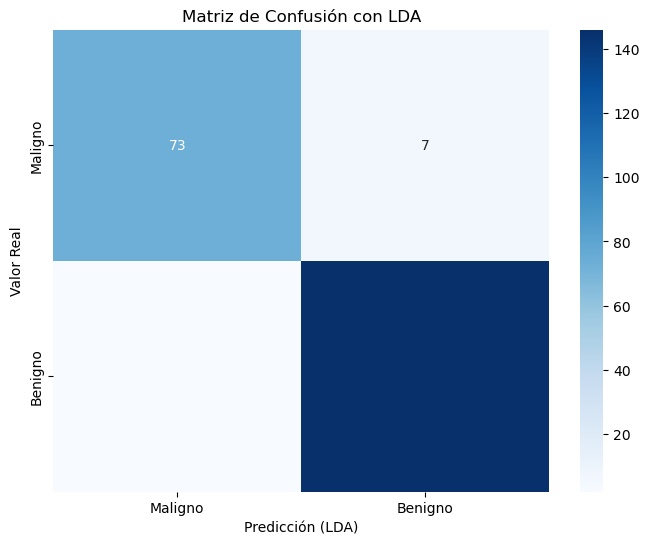

In [22]:
######################################
# Calcular la matriz de confusión
conf_matrix_cancer_lda = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (LDA)')
plt.title('Matriz de Confusión con LDA')
plt.show()

# *Incluir interpretación de LDA*

## DF Titanic

Para este método se utlizará el data frame Titanic,  que tiene las siguientes variables:  

- survived: Indica si el pasajero sobrevivió (1) o no (0).
- pclass: Clase del boleto del pasajero (1ra, 2da, 3ra clase).
- sex: Género del pasajero.
- age: Edad del pasajero.
- sibsp: Número de hermanos/cónyuges a bordo.
- parch: Número de padres/hijos a bordo.
- fare: Tarifa pagada por el boleto.
- embarked: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).
- survived: indica si el pasajero sobrevive 1, no sobrevive 0. (target)  
  
Sin embargo, para utlizar el df Titanic debemos realizar un análisis previo respecto de como se manejaran los datos nulos, para ello se realizará lo siguiente:  

 - Identificar que variables tienen valores nulos
 - Seleccionar el método que se utilizará para imputar los valores nulos


In [77]:
from sklearn.datasets import fetch_openml
#from sklearn.impute import KNNImputer

In [107]:
X1, y1 = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X1.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_arff_parser.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame = pd.concat(dfs, ignore_index=True)


In [109]:
#nombres de las columnas (variables)
print(X1.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')


In [111]:
# indentifica las columnas con nulos
print(X1.isnull().sum())

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


In [113]:
#identifica los nulos en target
print(y1.isnull().sum())

0


Al revisar la cantidad de datos nulos que contiene el data frame titanic, observamos que la variable **age (edad)** tiene 263 observaciones nulas y **cabin (cabina)**. Para solucionar esto utilizaremos imputación de datos con la moda, pero condiconada a otras variable para lograr mayor acertividad al momento de imputar.  

- Para *cabin* utilizamos *pclass* y *sex* para imputar según la moda del grupo.
- Para *age* utlizamos *pclass* , *sex*  y *cabin* para imputar según la moda del grupo.

Al realizar estos pasos se lograr imputar la totalidad de los nulos en *cabin*, sin embargo, en *age* quedan 16 observaciones que no es posible imputar porque no existe una moda para la combinación de valores de las 3 variables en conjunto, por lo tanto en el caso de esas 16 observaciones se imputará con la media de *age* por si sola.

**NOTA: cambie el nombre de X, y a X1, y1 para diferenciar los nombres con la base de cancer**

In [115]:
# reemplazamos con la moda según pclass y sex
X1['cabin'] = X1['cabin'].astype('category')

# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['cabin']):
        mode_value = X1[(X1['pclass'] == row['pclass']) & (X1['sex'] == row['sex'])]['cabin'].mode()
        return mode_value[0] if not mode_value.empty else row['cabin']  # Retorna la moda si existe
    else:
        return row['cabin']

# Aplicar la función
X1['cabin'] = X1.apply(impute_mode, axis=1)

# Comprobar resultados
print(X1['cabin'].isnull().sum())

0


In [117]:
# reemplazamos con la moda considerando pclass, sex y cabin
X1['age'] = X1['age'].astype('category')

# Función para imputar la moda condicionalmente
def impute_mode(row):
    if pd.isnull(row['age']):
        mode_value = X1[(X1['pclass'] == row['pclass']) & (X1['sex'] == row['sex']) & (X1['cabin'] == row['cabin'])]['age'].mode()
        return mode_value[0] if not mode_value.empty else row['age']  # Retorna la moda si existe
    else:
        return row['age']

# Aplicar la función
X1['age'] = X1.apply(impute_mode, axis=1)

# Comprobar resultados
print(X1['age'].isnull().sum())

16


quedan 16 observaciones con datos nulos, esto puede ser debido a que no existe una moda para el cruce de variables propuesto. Asi que imputamos por la media de *age*

In [119]:
# Calcular la media de la columna 'Age'
mean_age = X1['age'].mean()

# Imputar los valores faltantes con la media
X1['age'].fillna(mean_age, inplace=True)

# Verificar que no haya más valores faltantes en 'Age'
print(X1['age'].isnull().sum())

0


# Regresión Logística  

AL no existir nulos, los datos están preparados para aplicar Regresión Logística y Naive Bayes

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [132]:
#X1 = X1.drop('name', axis=1)
X1['sex'] = X1['sex'].map({'male': 0, 'female': 1})

In [144]:
# Dividir los datos en entrenamiento y prueba
Xrl_train, Xrl_test, yrl_train, yrl_test = train_test_split(X1, y1, test_size=0.4, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(Xrl_train, yrl_train)

# Hacer predicciones
yrl_pred = model.predict(Xrl_test)


X1: Contiene las características (todas las columnas excepto 'target').

y1: Contiene la etiqueta (columna 'target').

Luego, se dividen los datos en conjuntos de entrenamiento y prueba, y se entrena un modelo de Regresión Logística.

In [17]:
# Calcular la precisión (accuracy) y el recall
accuracy_rl = accuracy_score(yrl_test, yrl_pred)
recall_rl = recall_score(yrl_test, yrl_pred)

print(f"Exactitud del modelo (RL): {accuracy_rl:.4f}")
print(f"Recall del modelo (RL): {recall_rl:.4f}")

Exactitud del modelo (RL): 0.9693
Recall del modelo (RL): 0.9730


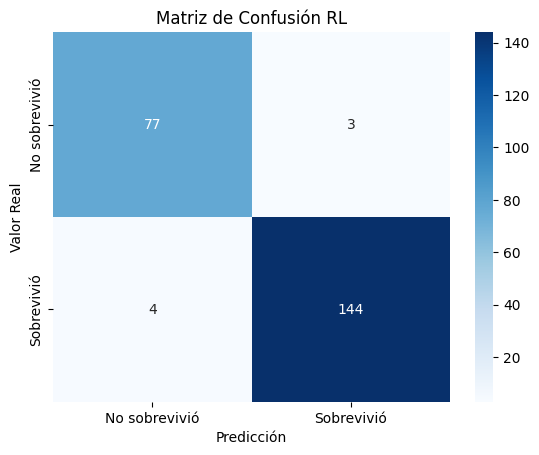

In [17]:
# Calcular la matriz de confusión
conf_matrix_rl = confusion_matrix(yrl_test, yrl_pred)

# Graficar la matriz de confusión
sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión RL')
plt.show()

# Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB

In [19]:
# Entrenar un modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) y el recall
accuracy_cancer_nb = accuracy_score(y_test, y_pred)
recall_cancer_nb = recall_score(y_test, y_pred)

print(f"Exactitud del modelo (Naive Bayes): {accuracy_cancer_nb:.4f}")
print(f"Recall del modelo (Naive Bayes): {recall_cancer_nb:.4f}")


Exactitud del modelo (Naive Bayes): 0.9518
Recall del modelo (Naive Bayes): 0.9730


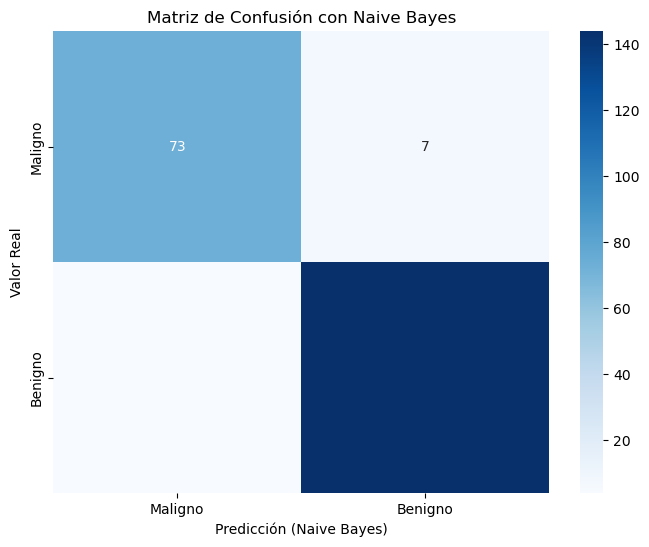

In [20]:
# Calcular la matriz de confusión
conf_matrix_cancer_nb = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (Naive Bayes)')
plt.title('Matriz de Confusión con Naive Bayes')
plt.show()

## KMeans (lo dejo porque el enunciado dice que hay que hacer al menos un metodo no supervisado)

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Cargar el dataset de breast cancer
#cancer_data = load_breast_cancer()
#df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
#df['target'] = cancer_data.target

# Dividir las características (X) y la etiqueta (y)
X2 = df_cancer.drop('target', axis=1)
y2 = df_cancer['target']

# Escalar las características (importante para K-means)
scaler2 = StandardScaler()
X2_scaled2 = scaler2.fit_transform(X)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42) #2 cluster (benigno o no maligno)
y2_kmeans = kmeans.fit_predict(X2_scaled2)




C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [31]:
# Calcular la precisión (accuracy) y el recall
accuracy_km = accuracy_score(y2, y2_kmeans)
recall_km = recall_score(y2, y2_kmeans)

print(f"Exactitud del modelo (K-means): {accuracy_km:.4f}")
print(f"Recall del modelo (K-means): {recall_km:.4f}")

Exactitud del modelo (K-means): 0.9104
Recall del modelo (K-means): 0.9608


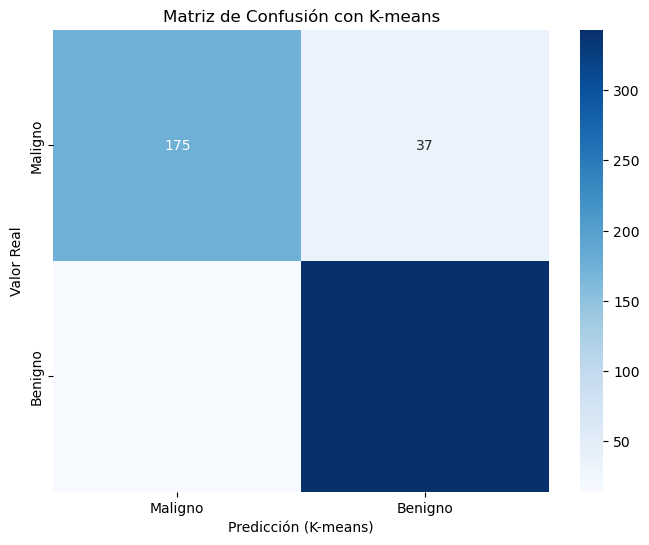

In [32]:
# Calcular la matriz de confusión
conf_matrix_cancer_km = confusion_matrix(y2, y2_kmeans)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cancer_km, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción (K-means)')
plt.title('Matriz de Confusión con K-means')
plt.show()


# Destino de los pasajeros